In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

os.chdir("..")
# os.chdir('C:\\Users\\Home\\Documents\\Github\\heart-diseases')
data = 'data/'
out = 'figures/'

pd.options.display.max_rows = None
pd.options.display.max_columns = None
plt.style.use('ggplot')

# Introduction

__Introduction:__

Heart disease is one fo the main cause of death in the U.S. According to the CDC, 1 in 5 death in the U.S. during 2020 was casued by heart disease. In this project we aim to discover the correlation between coronary disease rate and different health-related indicators. We will train some machine learning models that aim to predict whether a patient has heart disease using an array of input features. This project will help us gain a better understanding of heart diseases and create preventative solutions that target high-risk patients. This is a classification problem and our target variable is HeartDisease. We have 319,795 total data points and 18 features.

__Feature Description:__

"HeartDisease" is our target variable. It contains values 'Yes' and 'No' indicating whether a patient has heart disease. "BMI" refers to the patient body mass index. "Smoking" is a boolean variable that indicates whether the patient has smoked more than 100 cigarettes in his/her life. The column "AlcoholDrinking" refers to whether the patient is a heavy drinker (more than 14 drinks a week for man and 7 drinks a week for women). "Stroke" indicates whether the patient ever had a stroke. The "PhysicalHealth" column indicates the number of days in the past 30 the patient is injured for. "Mental Health"is a column that indicates how many days in the past 30 the patient thinks that his/her mental health is not good. "DiffWalking" is a boolean variable indicating whether the patient has difficulty walking or climbing stairs. "Sex" is a feature indicating patient's sex. "AgeCategory" describes the age bucket of the patient. "Race"is a categorical feature that describes the patient's race. "Diabetic" is a boolean variable describing whether the patient is diabetic. "PhysicalActivity" is a boolean variable that indicates whether the patient has done physical activities in the past 30 days. "GenHealth" is a self-reported ordinal feature of whether the patient this his/her health is good in general. "SleepTime" is a continuos variable detailing the average length of sleep the patient gets. "Asmthma" is a boolean variable indicating whether the patient has asthma. "KidneyDisease" is a boolean variable indicating whether the patient has kidney disease (not including kidney stones, bladder infection, or incontinence). "SkinCancer" indicates whether the patients has/had skin cancer.

__Dataset:__

This dataset is from Kaggle and uses the 2020 annual CDC survey data of 400k adults. The data is originally collected by the CDC's Behavioral Risk Factor Surveillance System (BRFSS). It was collected through interviews with more than 400,000 adults with respect to their health status. Originally the dataset has more than 300 featuers, which the Kaggle user, Kamil Pytlak has reduced to 20.

__Literature Research:__

Kaggle user Wessam Salah Walid tried to predict HeartDisease using all input features. He applied over-sampling method with respect to the target variables and adopted the random forest method to achieve around 93% test accuracy. His KNN model achieved around 88% test accuracy. His logistic regression model achieved around 75% test accuracy, and his XGBoost model achieved around 77% test accuracy. Lastly, he adopted a suite of models and applied a majority rule voting mechanism that incorporated all the above models and achieved around 91% test accuracy.

# EDA

In [2]:
df = pd.read_csv(data+'heart_2020_cleaned.csv')
print(df.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


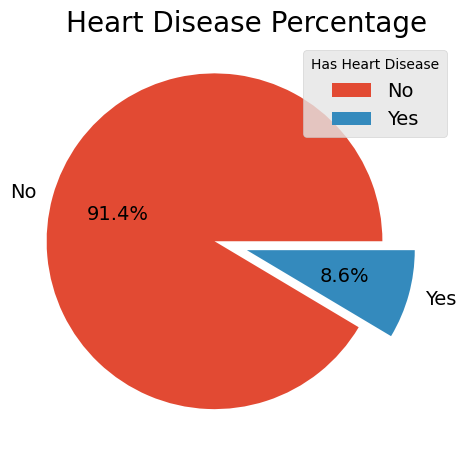

In [5]:
plt.figure()
plt.pie(
    df.HeartDisease.value_counts(), 
    labels = df.HeartDisease.value_counts().index,
    explode = [0.2, 0],
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)
plt.title("Heart Disease Percentage", fontsize=20)
plt.legend(title="Has Heart Disease", fontsize=14)

plt.tight_layout()
plt.savefig(out+"heart_disease_pie.png")
plt.show()

Figure 1.

Around 91.4% of survey participants do not have heart disease while 8.6% have heart disease.

C:\Users\Home\AppData\Local\Temp\ipykernel_18412\3768278717.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cols, rotation='vertical')


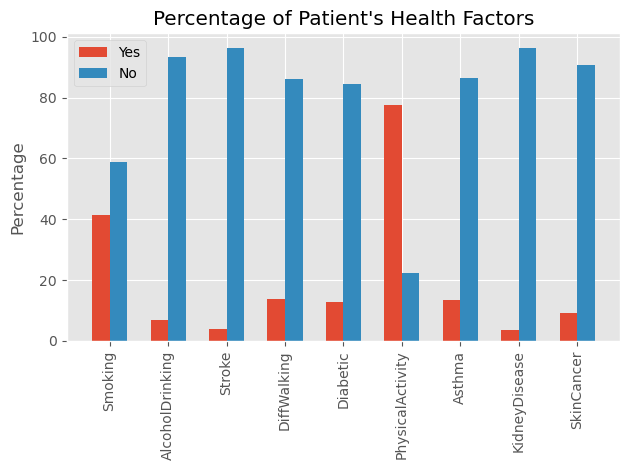

In [6]:
cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", \
        "Asthma", "KidneyDisease", "SkinCancer"]
yes_l = list()
no_l = list()
for c in cols:
    yes_l.append(np.round(df[c].value_counts()["Yes"]/len(df)*100, 2))
    no_l.append(np.round(df[c].value_counts()["No"]/len(df)*100, 2))

fig, ax = plt.subplots(1, 1)
width = 0.3   
i = np.arange(len(cols))
ax.bar(i, yes_l, width, label='Yes')
ax.bar(i + width, no_l, width, label='No')
ax.legend()
ax.set_xticklabels(cols, rotation='vertical')
ax.set_ylabel("Percentage")
ax.set_xticks(i+width/2)
ax.set_title("Percentage of Patient's Health Factors")

plt.tight_layout()
plt.savefig(out+"categorical_feat.png")
plt.show()

Figure 2.

Figure shows the percentage break down for some of the categorical variables. Around 41% participants have smoked more than 100 cigarettes in their life. About 7.8% of the patients identify themselves as heavy drinker. Around 3.7% of patients have had stroked. Around 13.9% patients have difficulty walking. Around 12-13% of patients are diabetic and 2.1% borderline diabetic. Around 78% participants work out regularly. About 13.4% of patients have asthma. 3.7% of patients have kidney diseases, and 9% of patients have skin cancer. 

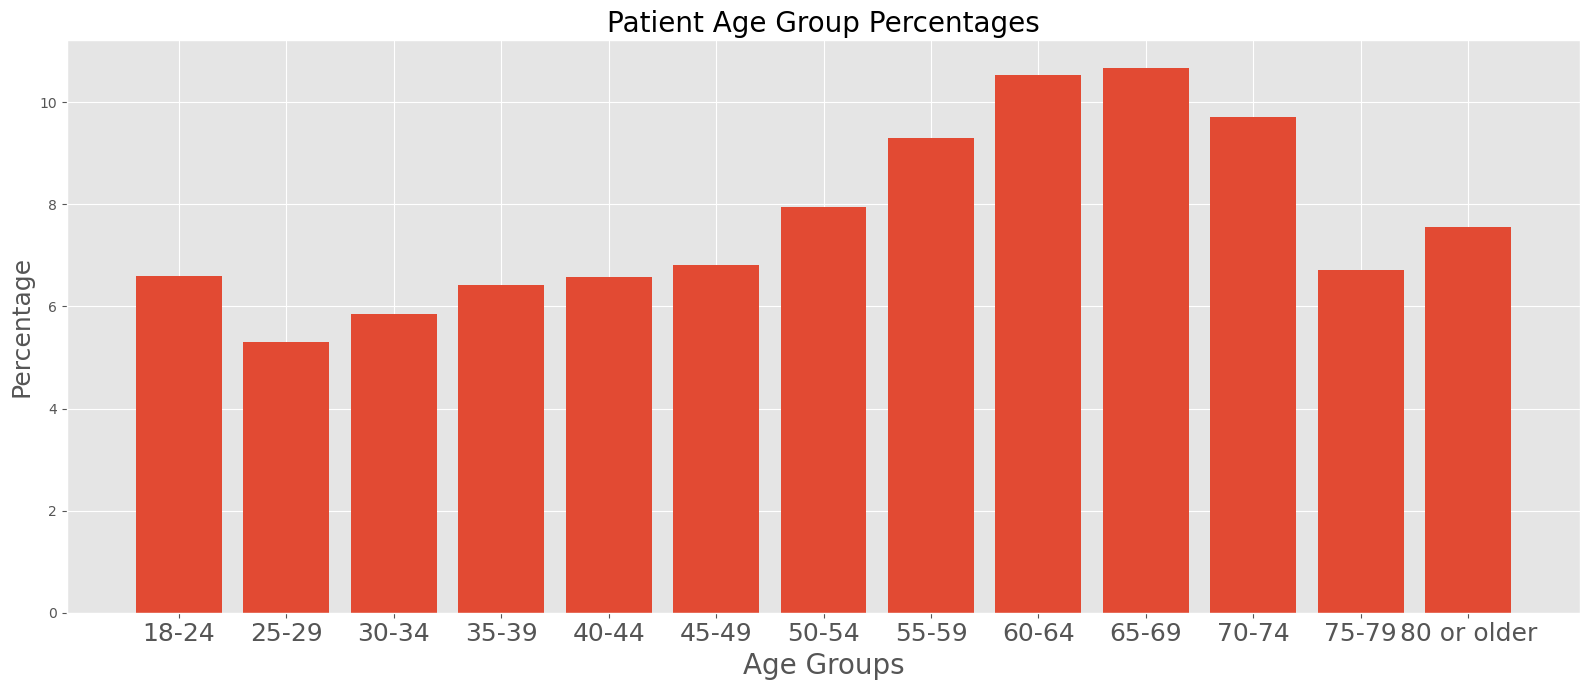

In [7]:
plt.figure(figsize=(16, 7))

plt.bar(
    df.AgeCategory.value_counts(sort=False).sort_index().index, 
    np.round(100*df.AgeCategory.value_counts(sort=False).sort_index()/len(df), 2)
)
plt.ylabel("Percentage", fontsize=18)
plt.xlabel("Age Groups", fontsize=20)
plt.title("Patient Age Group Percentages", fontsize=20)
plt.xticks(fontsize=18)

plt.tight_layout()
plt.savefig(out+"age_group_percentage.png")
plt.show()

Figure 3.

Figure 3 shows the break down of survey participants' age groups. We see that the most common age group is between 65-69 and the least common group is 25-29. The graph indicates that the survey participants' age distribution is skewed towards older population.

<Figure size 1200x500 with 0 Axes>

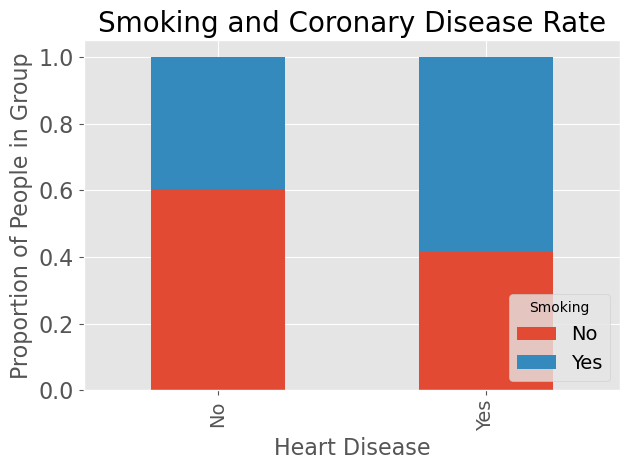

In [8]:
count_matrix = df.groupby(["HeartDisease", "Smoking"]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(12,5))
count_matrix_norm.plot(kind='bar', stacked=True, fontsize=16)
plt.title("Smoking and Coronary Disease Rate", fontsize=20)
plt.ylabel('Proportion of People in Group', fontsize=16)
plt.legend(loc=4, title="Smoking", fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Heart Disease", fontsize=16)

plt.tight_layout()
plt.savefig(out+ "smoking_heart_disease_stackbar.png")
plt.show()

Figure 4.

This graph shows the percentage of people who smoke vs the population that have hear disease. In the figure, the blue represents the percentage of the population that have smoked more othan 100 cigarettes, and the red represents the percentage of people that don't smoke. We see that people with heart disease have a larger proportion of smokers than people who don't have heart disease. This indicates a possible correlation between smoking and heart diseases.

<Figure size 1200x500 with 0 Axes>

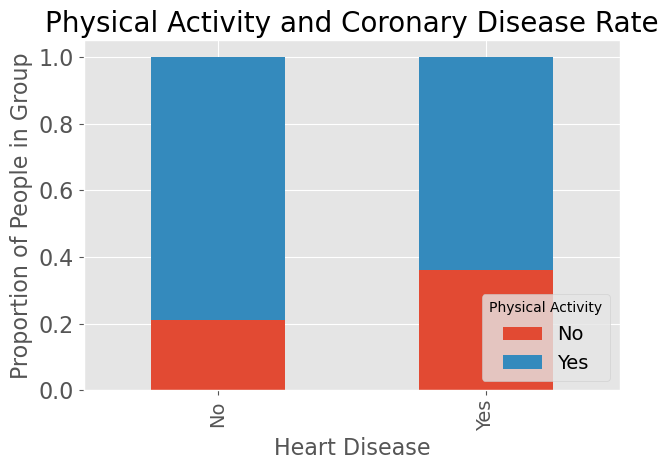

In [9]:
count_matrix = df.groupby(["HeartDisease", "PhysicalActivity"]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(12,5))
count_matrix_norm.plot(kind='bar', stacked=True, fontsize=16)
plt.title("Physical Activity and Coronary Disease Rate", fontsize=20)
plt.ylabel('Proportion of People in Group', fontsize=16)
plt.legend(loc=4, title="Physical Activity", fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Heart Disease", fontsize=16)

plt.tight_layout()
plt.savefig(out+ "physicalactivity_heart_disease_stackbar.png")
plt.show()

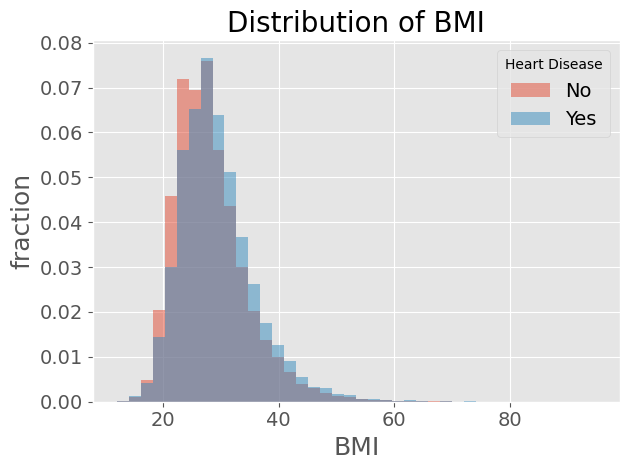

In [10]:
categories = df['HeartDisease'].unique()
bin_range = (df['BMI'].min(),df['BMI'].max())

for c in categories:
    plt.hist(df[df['HeartDisease']==c]['BMI'],alpha=0.5,label=c,range=bin_range,bins=40,density=True)
plt.legend(title="Heart Disease", fontsize=14)
plt.ylabel('fraction', fontsize=18)
plt.xlabel('BMI', fontsize=18)
plt.title("Distribution of BMI", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig(out+"bmi_heart_disease_histo.png")
plt.show()

Figure 5.

Figure 5 shows two histograms of the body-mass index. The blue histogram shows the distribution of BMI for people with heart diseases, and the red histogram shows the distribution of BMI of those who don't have heart disease. We see that the two histograms follow similar distribution except that the blue histogram seems to have slighly higher mean and median than the red histogram. This indicates that in general people with heart diseases have higher body-mass index than people without heart disease. 

# Data Preprocessing

We have numerous categorical features, such as "HeartDisease", "Smoking", and "AlcholDrinking", that have only two categories - 'Yes' and 'No'. We will treat those columns as boolean vairables and map the value 1 to the value "Yes" and 0 to the value "No". 

In [67]:
# Replace Yes/No with boolean variables
bool_col = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", \
            "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
for col in bool_col:
    df[col] = df[col].replace(("Yes", "No"), (1, 0))

Our data is IID because each row represents a unique survey participant who is independent from other participants. There is no group structure, and there is no time series data. Therefore, we can either use a classic train, validation, test split of proportion (0.6, 0.2, 0.2) or we can use k-fold split to split the data into multiple folds of training and testing sets. Here we will utilize the traditional train, validation, test split.

In [68]:
# Train test split
X = df.drop("HeartDisease", axis=1)
y = df[["HeartDisease"]]
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=2)

print("Train size: ", len(X_train), "(", np.round(len(X_train)/len(X)*100, 2), "%)")
print("Validation size: ", len(X_val), "(", np.round(len(X_val)/len(X)*100, 2), "%)")
print("Test size: ", len(X_test), "(", np.round(len(X_test)/len(X)*100, 2), "%)")

Train size:  191877 ( 60.0 %)
Validation size:  63959 ( 20.0 %)
Test size:  63959 ( 20.0 %)


We have one ordinal feature - "GenHealth", which reports the survey participants' self-reported health status. We will use an ordinal encoder to encode this feature. For categorical features - "Sex", "AgeCategory", "Race", and "Diabetic", we will one hot encode each of the category from each feature. For numerical features - "BMI", "PhysicalHealth", "MentalHealth", "SleepTime" mostly follow tailed distributions. Features such as "PhysicalHealth" and "MentalHealth" are especially skewed with most people reporting to have relatively low values with a few exceptions of very high values. Therefore, we want to use a standard scaler to normalize the values.

In [187]:
# Apply transformers
ord_features = ["GenHealth"]
ord_cat = [["Poor", "Fair", "Good", "Very good", "Excellent"]]

ohe_features = ["Sex", "AgeCategory", "Race", "Diabetic"]
standard_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ord_cat), ord_features),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), ohe_features),
        ('std', StandardScaler(), standard_features)])

prep = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = prep.fit_transform(X_train)
X_val_prep = prep.transform(X_val)
X_test_prep = prep.transform(X_test)

print("Shape of training set before transformer: ", X_train.shape)
print("Shape of training set after transformer: ", X_train_prep.shape)


Shape of training set before transformer:  (191877, 17)
Shape of training set after transformer:  (191877, 30)


# Calculate Baseline

In [70]:
def calc_baseline(beta, pct_n0):
    return (1+np.square(beta))*(1-pct_n0)/(np.square(beta)*(1-pct_n0) + 1)

pct_n0 = len(df[df["HeartDisease"] == False])/len(df)
calc_baseline(2, pct_n0)

0.31881934463424233

# ML pipeline

In [71]:
models = []

## Logistic Regression

In [74]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid for hyperparameter tuning
param_grid = [
    {'penalty': ["l1", "l2", "none"], "C": [1, 10, 100, 1000], 
     "solver": ["saga"], "max_iter": [1e7], "class_weight":["balanced"]},
    {'penalty': ["elasticnet"], "C": [1, 10, 100, 1000], \
     "solver": ["saga"], "max_iter": [1e7], "class_weight":["balanced"], \
     "l1_ratio": [0.2, 0.4, 0.6, 0.8]}
]

#Logistic regression model
clf = LogisticRegression(random_state=2)
grid = GridSearchCV(
    clf, param_grid=param_grid,scoring = f2_scorer,
    cv=4, return_train_score = True, n_jobs=-1, verbose=True
)
grid.fit(X_train_prep, y_train.values.ravel())

#Record model and scores
models.append(grid)
train_score = grid.score(X_train_prep, y_train)
val_score = grid.score(X_val_prep, y_val)
test_score = grid.score(X_test_prep, y_test)

print("Params:", grid.best_params_)
print("Train:", train_score, "| Val:", val_score)
print("Test:", test_score)

Fitting 4 folds for each of 28 candidates, totalling 112 fits
Params: {'C': 1, 'class_weight': 'balanced', 'l1_ratio': 0.2, 'max_iter': 10000000.0, 'penalty': 'elasticnet', 'solver': 'saga'}
Train: 0.5088413600636987 | Val: 0.5099959200326398
Test: 0.5075836325836326


In [125]:
# Run the model on 10 random states
train_scores_logreg = []
test_scores_logreg = []
train_f2_logreg = []
test_f2_logreg = []


for i in range(0, 10):
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i)
    
    clf = LogisticRegression(**models[0].best_params_, random_state=i)

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ("log-reg", clf)
    ])
    
    pipe.fit(X_train, y_train.values.ravel())
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    train_f2 = fbeta_score(y_train, y_pred_train, beta=2)
    test_f2 = fbeta_score(y_test, y_pred_test, beta=2)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    train_scores_logreg.append(train_acc)
    test_scores_logreg.append(test_acc)
    
    train_f2_logreg.append(train_f2)
    test_f2_logreg.append(test_f2)
    
print("Train Accuracy Mean =", np.mean(train_scores_logreg), \
      ", Standard Deviation =", np.std(train_scores_logreg))
print("Train f2 Mean =", np.mean(train_f2_logreg), \
      ", Standard Deviation =", np.std(train_f2_logreg))
print("Test Accuracy Mean =", np.mean(test_scores_logreg), \
      ", Standard Deviation =", np.std(test_scores_logreg))
print("Test f2 Mean =", np.mean(test_f2_logreg), \
      ", Standard Deviation =", np.std(test_f2_logreg))

Train Accuracy Mean = 0.7323462426450278 , Standard Deviation = 0.0013363060511477193
Train f2 Mean = 0.5090762357097474 , Standard Deviation = 0.0011805630565319084
Test Accuracy Mean = 0.7319470285651745 , Standard Deviation = 0.0021190286882777475
Test f2 Mean = 0.5089213717714921 , Standard Deviation = 0.004442838119965772


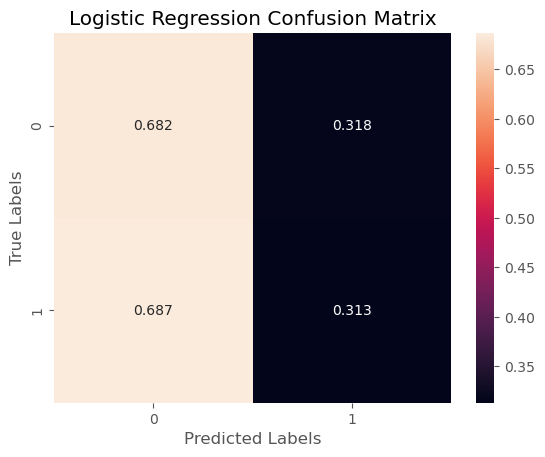

In [116]:
from sklearn.metrics import confusion_matrix
y_pred = models[0].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure()

ax = sns.heatmap(cm, annot=True, fmt=".3f")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    "max_depth": np.arange(10, 110, 20),
    "n_estimators": np.arange(100, 1100, 200),
    "class_weight": ["balanced"]
}

clf = RandomForestClassifier(random_state=2)
grid = GridSearchCV(
    clf, param_grid=param_grid, scoring = f2_scorer,
    cv=4, return_train_score = True, n_jobs=-1, verbose=True
)
grid.fit(X_train_prep, y_train.values.ravel())

#Record model and scores
models.append(grid)
train_score = grid.score(X_train_prep, y_train)
val_score = grid.score(X_val_prep, y_val)
test_score = grid.score(X_test_prep, y_test)

print("Params:", grid.best_params_)
print("Train:", train_score, "| Val:", val_score)
print("Test:", test_score)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
Train: 0.3414084247820186 | Val: 0.20588850417121743
Test: 0.20642521735087638


In [124]:
# Run the model on 10 random states
train_scores_rf = []
test_scores_rf = []
train_f2_rf = []
test_f2_rf = []


for i in range(0, 10):
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i)
    
    clf = RandomForestClassifier(**models[1].best_params_, random_state=i)

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ("random-forest", clf)
    ])
    
    pipe.fit(X_train, y_train.values.ravel())
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    train_f2 = fbeta_score(y_train, y_pred_train, beta=2)
    test_f2 = fbeta_score(y_test, y_pred_test, beta=2)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    train_scores_rf.append(train_acc)
    test_scores_rf.append(test_acc)
    
    train_f2_rf.append(train_f2)
    test_f2_rf.append(test_f2)
    
print("Train Accuracy Mean =", np.mean(train_scores_rf), \
      ", Standard Deviation =", np.std(train_scores_rf))
print("Train f2 Mean =", np.mean(train_f2_rf), \
      ", Standard Deviation =", np.std(train_f2_rf))
print("Test Accuracy Mean =", np.mean(test_scores_rf), \
      ", Standard Deviation =", np.std(test_scores_rf))
print("Test f2 Mean =", np.mean(test_f2_rf), \
      ", Standard Deviation =", np.std(test_f2_rf))

Train Accuracy Mean = 0.735409142315129 , Standard Deviation = 0.0029469859930721363
Train f2 Mean = 0.5182298848648083 , Standard Deviation = 0.0016337218199499225
Test Accuracy Mean = 0.7320939977172877 , Standard Deviation = 0.002329848252304956
Test f2 Mean = 0.505996175082623 , Standard Deviation = 0.004811504836112583


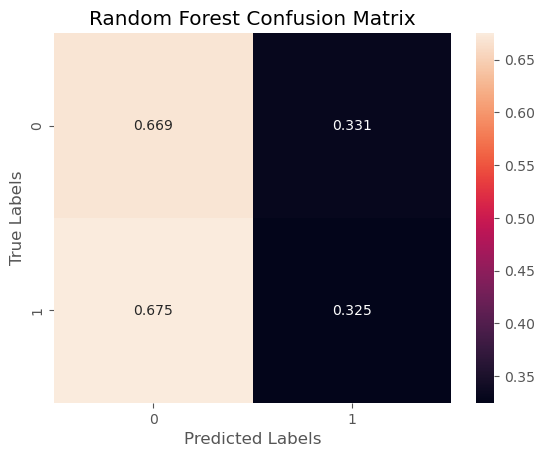

In [117]:
y_pred = models[1].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure()

ax = sns.heatmap(cm, annot=True, fmt=".3f")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Random Forest Confusion Matrix")

plt.show()

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors": [3, 5, 10, 20],
    "weights": ["uniform", "distance"],
}

clf = KNeighborsClassifier()
grid = GridSearchCV(
    clf, param_grid=param_grid,scoring = f2_scorer,
    cv=4, return_train_score = True, n_jobs=-1, verbose=True
)
grid.fit(X_train_prep, y_train.values.ravel())

#Record model and scores
models.append(grid)
train_score = grid.score(X_train_prep, y_train)
val_score = grid.score(X_val_prep, y_val)
test_score = grid.score(X_test_prep, y_test)

print("Params:", grid.best_params_)
print("Train:", train_score, "| Val:", val_score)
print("Test:", test_score)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Params: {'n_neighbors': 3, 'weights': 'distance'}
Train: 0.8575123353714421 | Val: 0.048828125
Test: 0.04406628218666234


In [107]:
# Run the model on 10 random states
train_scores_knn = []
test_scores_knn = []
train_f2_knn = []
test_f2_knn = []


for i in range(0, 10):
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i)
    
    clf = KNeighborsClassifier(**models[2].best_params_)

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ("knn", clf)
    ])
    
    pipe.fit(X_train, y_train.values.ravel())
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    train_f2 = fbeta_score(y_train, y_pred_train, beta=2)
    test_f2 = fbeta_score(y_test, y_pred_test, beta=2)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    train_scores_knn.append(train_acc)
    test_scores_knn.append(test_acc)
    
    train_f2_knn.append(train_f2)
    test_f2_knn.append(test_f2)
    
print("Train Accuracy Mean =", np.mean(train_scores_knn), \
      ", Standard Deviation =", np.std(train_scores_knn))
print("Train f2 Mean =", np.mean(train_f2_knn), \
      ", Standard Deviation =", np.std(train_f2_knn))
print("Test Accuracy Mean =", np.mean(test_scores_knn), \
      ", Standard Deviation =", np.std(test_scores_knn))
print("Test f2 Mean =", np.mean(test_f2_knn), \
      ", Standard Deviation =", np.std(test_f2_knn))

Train Accuracy Mean = 0.9895287084955466 , Standard Deviation = 0.00012409471621776546
Train f2 Mean = 0.908723679299087 , Standard Deviation = 0.0009584703951926743
Test Accuracy Mean = 0.88644131396676 , Standard Deviation = 0.0012873316333251528
Test f2 Mean = 0.17660830349954754 , Standard Deviation = 0.0037300369423612168


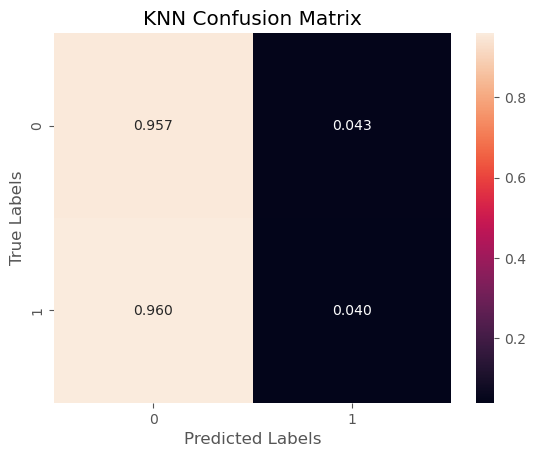

In [118]:
y_pred = models[2].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure()

ax = sns.heatmap(cm, annot=True, fmt=".3f")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("KNN Confusion Matrix")

plt.show()

## XGBoost

In [140]:
import xgboost

param_grid = {
    "eta": [0.1, 0.3, 0.5],
    "max_depth": [5, 10, 20],
    "n_estimators": np.arange(100, 1100, 250),
    "scale_pos_weight": [1, 10, 50, 100]
}

clf = xgboost.XGBClassifier(random_state=2)
grid = GridSearchCV(
    clf, param_grid=param_grid,scoring = f2_scorer,
    cv=4, return_train_score = True, n_jobs=-2, verbose=True
)
grid.fit(
    X_train_prep, 
    y_train.values.ravel(),
    eval_metric=f2_scorer
)

# #Record model and scores
# models.append(grid)
models[3] = grid
train_score = grid.score(X_train_prep, y_train.values.ravel())
val_score = grid.score(X_val_prep, y_val.values.ravel())
test_score = grid.score(X_test_prep, y_test.values.ravel())

print("Params:", grid.best_params_)
print("Train:", train_score, "| Val:", val_score)
print("Test:", test_score)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:33:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Params: {'eta': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 10}
Train: 0.5206887751032845 | Val: 0.20013044108411032
Test: 0.5047069250485064


In [142]:
# Run the model on 10 random states
train_scores_xgb = []
test_scores_xgb = []
train_f2_xgb = []
test_f2_xgb = []


for i in range(0, 10):
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i)
    prep = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = prep.fit_transform(X_train)
    X_test_prep = prep.transform(X_test)
    
    clf = xgboost.XGBClassifier(**models[3].best_params_, random_state=i)
    
    clf.fit(X_train_prep, y_train.values.ravel(), eval_metric=f2_scorer)
    y_pred_train = clf.predict(X_train_prep)
    y_pred_test = clf.predict(X_test_prep)
    
    train_f2 = fbeta_score(y_train.values.ravel(), y_pred_train, beta=2)
    test_f2 = fbeta_score(y_test.values.ravel(), y_pred_test, beta=2)
    
    train_acc = accuracy_score(y_train.values.ravel(), y_pred_train)
    test_acc = accuracy_score(y_test.values.ravel(), y_pred_test)
    
    train_scores_xgb.append(train_acc)
    test_scores_xgb.append(test_acc)
    
    train_f2_xgb.append(train_f2)
    test_f2_xgb.append(test_f2)
    
print("Train Accuracy Mean =", np.mean(train_scores_xgb), \
      ", Standard Deviation =", np.std(train_scores_xgb))
print("Train f2 Mean =", np.mean(train_f2_xgb), \
      ", Standard Deviation =", np.std(train_f2_xgb))
print("Test Accuracy Mean =", np.mean(test_scores_xgb), \
      ", Standard Deviation =", np.std(test_scores_xgb))
print("Test f2 Mean =", np.mean(test_f2_xgb), \
      ", Standard Deviation =", np.std(test_f2_xgb))

C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Home\anaconda3\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Mean = 0.7348322102180042 , Standard Deviation = 0.0026126577271422
Train f2 Mean = 0.5195241254521943 , Standard Deviation = 0.0007633262329543015
Test Accuracy Mean = 0.7322800544098562 , Standard Deviation = 0.0026835213212178725
Test f2 Mean = 0.5110170941424389 , Standard Deviation = 0.004325863103750055


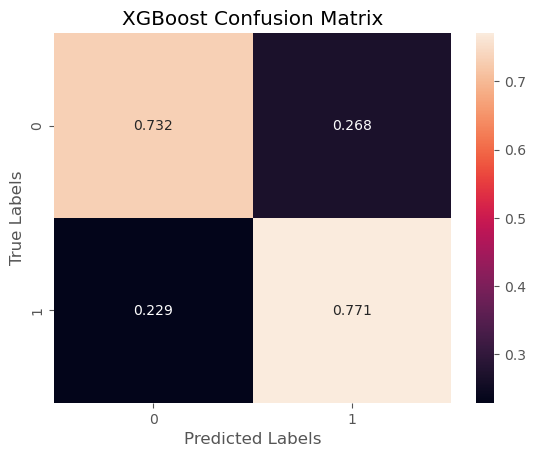

In [144]:
y_pred = models[3].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")

plt.figure()

ax = sns.heatmap(cm, annot=True, fmt=".3f")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("XGBoost Confusion Matrix")

plt.show()

# Model Comparison

In [1]:
models_df = pd.DataFrame(
    columns = [
        "models", "parameters", "train f2 mean", "train f2 std", \
        "test f2 mean", "test f2 std", "test accuracy mean"
    ]
)

models_df["models"] = ["Logistic Regression", "Random Forest", "KNN", "XGBoost"]
models_df["parameters"] = [x.best_params_ for x in models]

models_df["test f2 mean"] = [
    np.round(np.mean(test_f2_logreg), 4), np.round(np.mean(test_f2_rf), 4), \
    np.round(np.mean(test_f2_knn), 4), np.round(np.mean(test_f2_xgb), 4)
]
models_df["test f2 std"] = [
    np.round(np.std(test_f2_logreg), 4), np.round(np.std(test_f2_rf), 4), \
    np.round(np.std(test_f2_knn), 4), np.round(np.std(test_f2_xgb), 4)
]
models_df["test accuracy mean"] = [
    np.round(np.mean(test_scores_logreg), 4), np.round(np.mean(test_scores_rf), 4), \
    np.round(np.mean(test_scores_knn), 4), np.round(np.mean(test_scores_xgb), 4)
]

models_df

NameError: name 'pd' is not defined

In [174]:
models_df.to_excel("out/models_summary.xlsx", index=False)

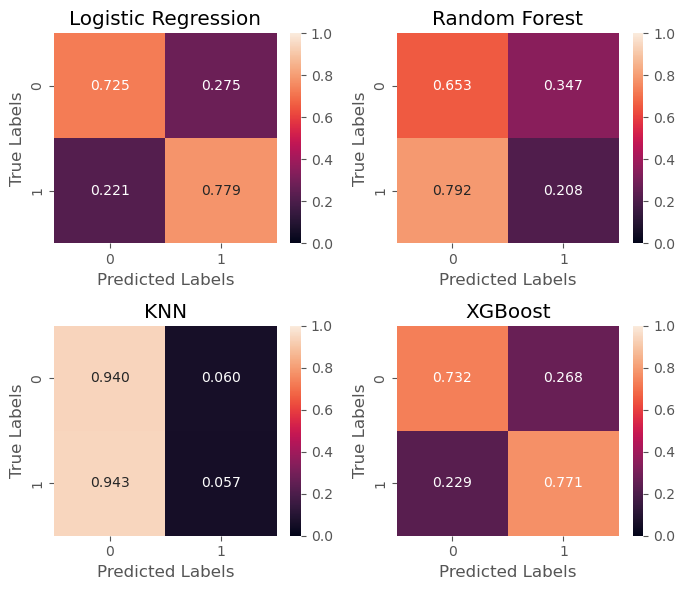

In [186]:
plt.figure(figsize=(7, 6))

plt.subplot(2,2,1)
y_pred = models[0].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")
ax = sns.heatmap(cm, annot=True, fmt=".3f", vmin=0, vmax=1)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Logistic Regression")

plt.subplot(2,2,2)
y_pred = models[1].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")
ax = sns.heatmap(cm, annot=True, fmt=".3f", vmin=0, vmax=1)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Random Forest")

plt.subplot(2,2,3)
y_pred = models[2].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")
ax = sns.heatmap(cm, annot=True, fmt=".3f", vmin=0, vmax=1)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("KNN")

plt.subplot(2,2,4)
y_pred = models[3].predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred, normalize="true")
ax = sns.heatmap(cm, annot=True, fmt=".3f", vmin=0, vmax=1)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("XGBoost")

plt.tight_layout()
plt.savefig("figures/confusion_matrices.png")
plt.show()

# Features Importance

array(['ord__GenHealth', 'onehot__Sex_Female', 'onehot__Sex_Male',
       'onehot__AgeCategory_18-24', 'onehot__AgeCategory_25-29',
       'onehot__AgeCategory_30-34', 'onehot__AgeCategory_35-39',
       'onehot__AgeCategory_40-44', 'onehot__AgeCategory_45-49',
       'onehot__AgeCategory_50-54', 'onehot__AgeCategory_55-59',
       'onehot__AgeCategory_60-64', 'onehot__AgeCategory_65-69',
       'onehot__AgeCategory_70-74', 'onehot__AgeCategory_75-79',
       'onehot__AgeCategory_80 or older',
       'onehot__Race_American Indian/Alaskan Native',
       'onehot__Race_Asian', 'onehot__Race_Black',
       'onehot__Race_Hispanic', 'onehot__Race_Other',
       'onehot__Race_White', 'onehot__Diabetic_No',
       'onehot__Diabetic_No, borderline diabetes', 'onehot__Diabetic_Yes',
       'onehot__Diabetic_Yes (during pregnancy)', 'std__BMI',
       'std__PhysicalHealth', 'std__MentalHealth', 'std__SleepTime'],
      dtype=object)

[21:14:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


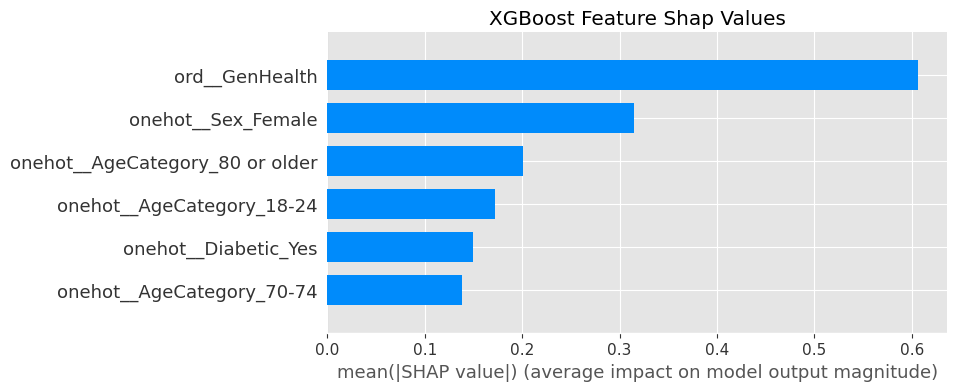

In [206]:
import shap
shap.initjs()

clf = xgboost.XGBClassifier(**models[3].best_params_, random_state=i)
clf.fit(X_train_prep, y_train.values.ravel(), eval_metric=f2_scorer)
feature_names = preprocessor.get_feature_names_out()

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_prep)

plt.figure()
shap.summary_plot(
    shap_values, 
    X_test_prep, 
    plot_type="bar", 
    max_display = 6,
    feature_names=feature_names,
    show=False
)
plt.title("XGBoost Feature Shap Values")
plt.tight_layout()
plt.savefig("fig")
plt.show()

# Reference

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=About%20697%2C000%20people%20in%20the,1%20in%20every%205%20deaths
https://www.kaggle.com/code/wessamwalid/heart-disease-prediction-eda-modelling